# Project #3 - Big Data Analysis using Data Golf

This project uses datagolf.com API in order to analyze the upcoming ryder cup tournament. Data is retrieved through the API to a total size of 3.3k rows and 87 columns. The data is then sliced to analyze only 24 players and their stats covering up to two years of stats.

The data is used to answer the following questions:

1) What team is favoured in the Ryder Cup?

2) What are each teams key strengths/weaknesses?

3) Was Ludvig Åberg a wild pick?



This document includes the following:
1) Info on Data Golf API
2) Importing necessary libraries
3) Using API to retrieve data
4) Cleaning, merging, categorizing and relabbeling data
5) Visualizing data using various libraries and plot types

The end result is summarised in a presentation. 

# 1) Description of Data Golf API

Data Golf API Info : https://datagolf.com/api-access

Overview
The  data golf  API is set of simple endpoints/urls that allow you to programmatically retrieve our data. The goal is to provide a more efficient way for you to interact with and integrate our data into your models/applications.

The API can be divided into six general categories:
1. General Use — updated field lists, tee times, DFS salaries.
2. Model Predictions — historical, pre-tournament, and live predictions from our baseline and course-specific models.
3. Betting Tools — live odds data streaming out of our Outright and Match-Up & 3-Ball betting tools.
4. Historical Raw Data — round-level scoring, stats, strokes-gained, and tee time data from 22 global tours, all connected under one player ID system.
5. Historical Odds — historical opening and closing lines from outright/finish position and matchup markets offered at various sportsbooks.
6. Historical DFS Data — historical fantasy points in DraftKings and FanDuel main slate competitions.

Authentication:

We have made authentication as simple as possible. Just add your API key as a parameter to the query string of every request you make to our endpoints. 

Here is an example url:
https://feeds.datagolf.com/example-api-endpoint?example_param=10&key=af47518fe220516e4339fc678956
If you're having trouble getting started, email us and we'll help you out.

# 2) Import Necessary Libraries

In [1]:
import pandas as pd
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [145]:
# Set the maximum number of rows to be displayed to a desired value (e.g., 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 3) Retrieving data by using `Data Golf API`

In [3]:
# Enter your Data Golf API Key
api_key = [GET YOUR KEY AT DATAGOLF.COM]

file_format = "json"

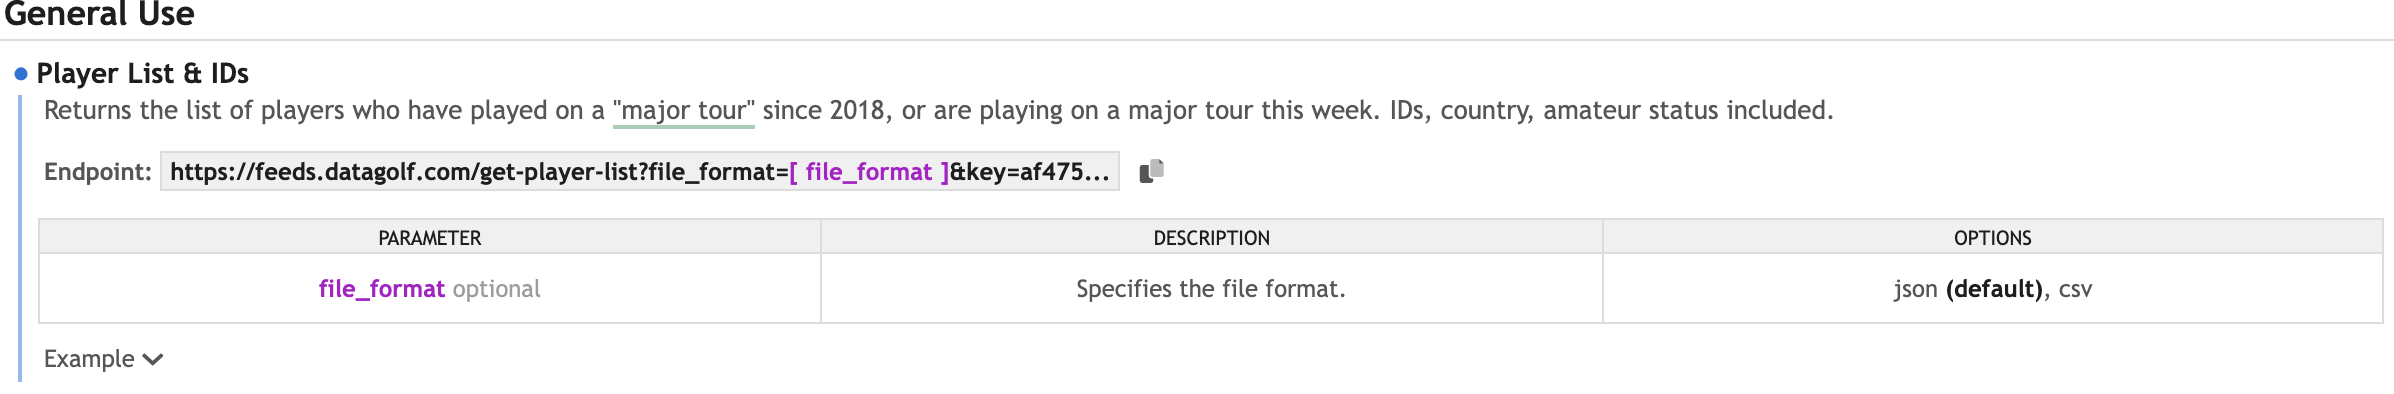

In [4]:
# Player Lists & IDs
url = f"https://feeds.datagolf.com/get-player-list?file_format={file_format}&{api_key}"
r = requests.get(url)
players = r.json()
players = pd.DataFrame(players)
swe = players["country"] == "Sweden"
players_swe = players.loc[swe]

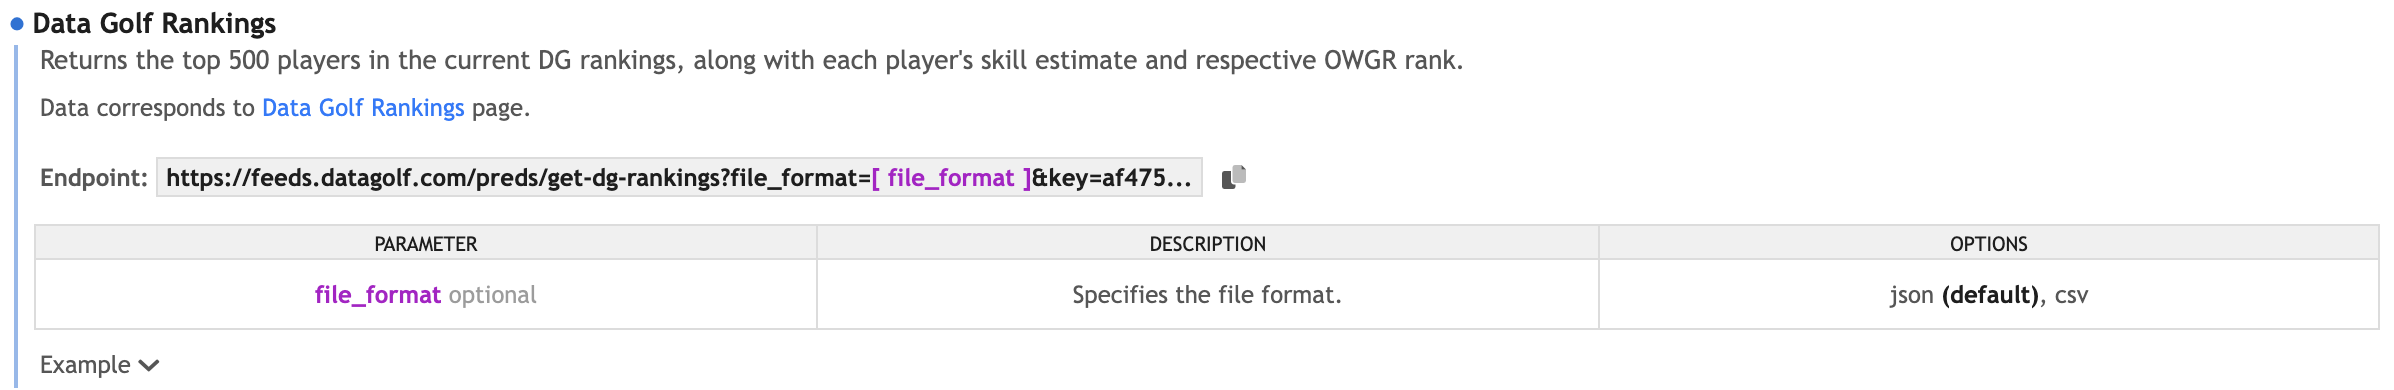

#### Players Data Golf Ranking

In [5]:
url = f"https://feeds.datagolf.com/preds/get-dg-rankings?file_format={file_format}&{api_key}"
r = requests.get(url)
dg_rank_json = r.json()
dg_rank = pd.DataFrame(dg_rank_json["rankings"])
swe = dg_rank["country"] == "SWE"
dg_rank_swe = dg_rank.loc[swe]

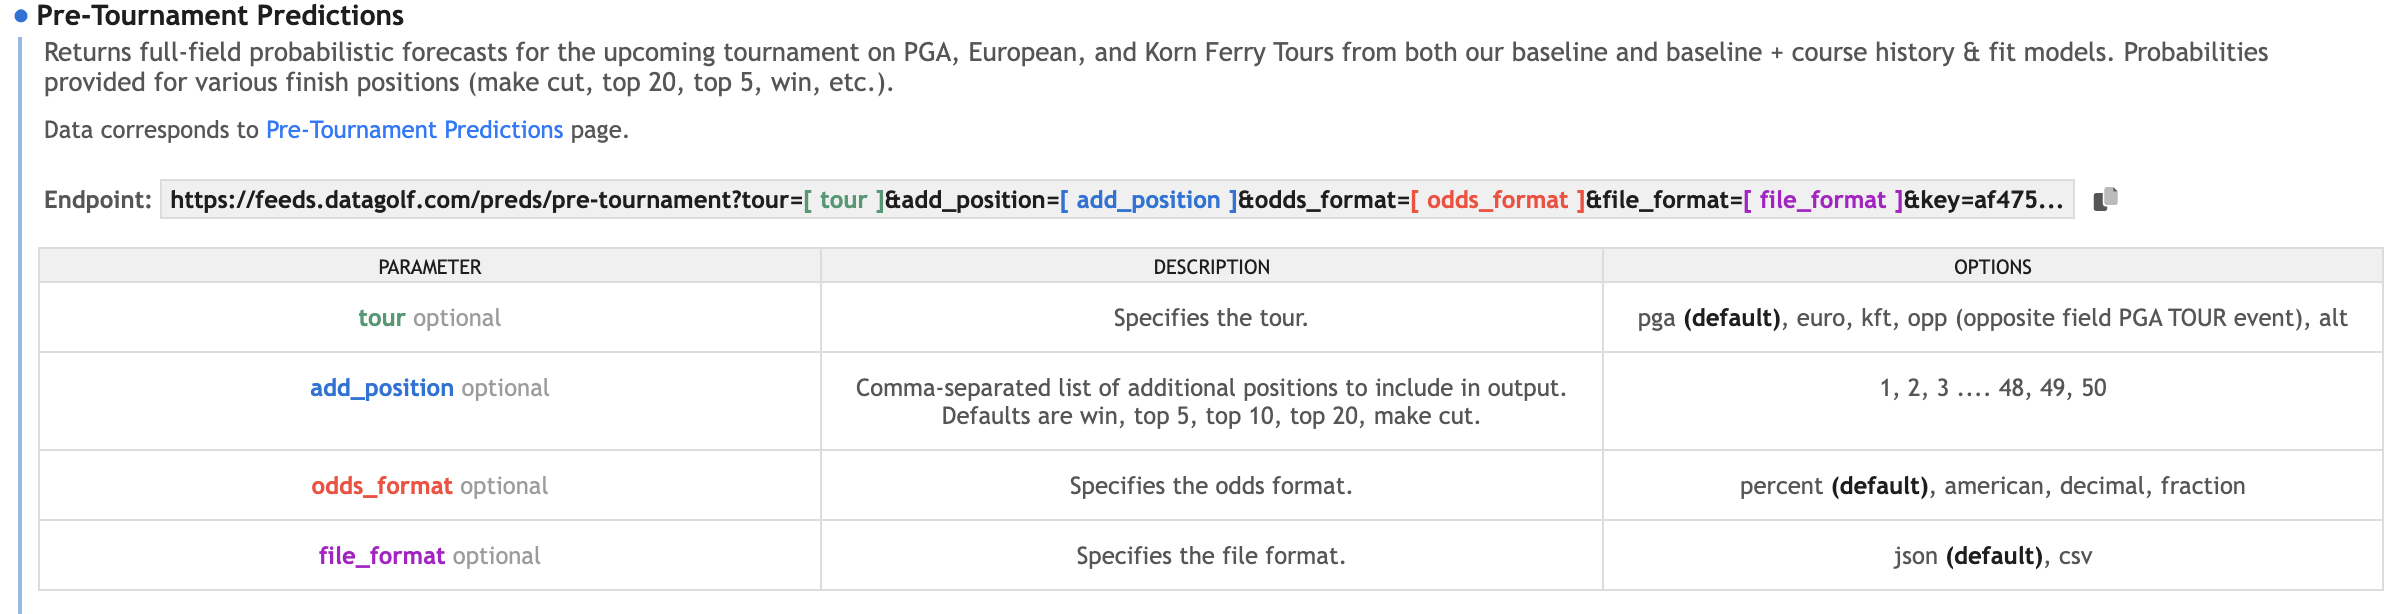

#### Tournament Predictions

In [6]:
odds_format = "percent"
tour = "euro"
add_position = "50"

url = f"https://feeds.datagolf.com/preds/pre-tournament?tour={tour}&add_position={add_position}&odds_format={odds_format}&file_format={file_format}&{api_key}"
r = requests.get(url)
tour_predict_json = r.json()
tour_predict_euro_name = tour_predict_json["event_name"]
tour_predict_euro = pd.DataFrame(tour_predict_json["baseline"])
tour_predict2_euro = pd.DataFrame(tour_predict_json["baseline_history"])

In [7]:
odds_format = "percent"
tour = "pga"
add_position = "50"

url = f"https://feeds.datagolf.com/preds/pre-tournament?tour={tour}&add_position={add_position}&odds_format={odds_format}&file_format={file_format}&{api_key}"
r = requests.get(url)
tour_predict_json = r.json()
tour_predict_pga_name = tour_predict_json["event_name"]
tour_predict_pga = pd.DataFrame(tour_predict_json["baseline"])
tour_predict2_pga = pd.DataFrame(tour_predict_json["baseline_history_fit"])

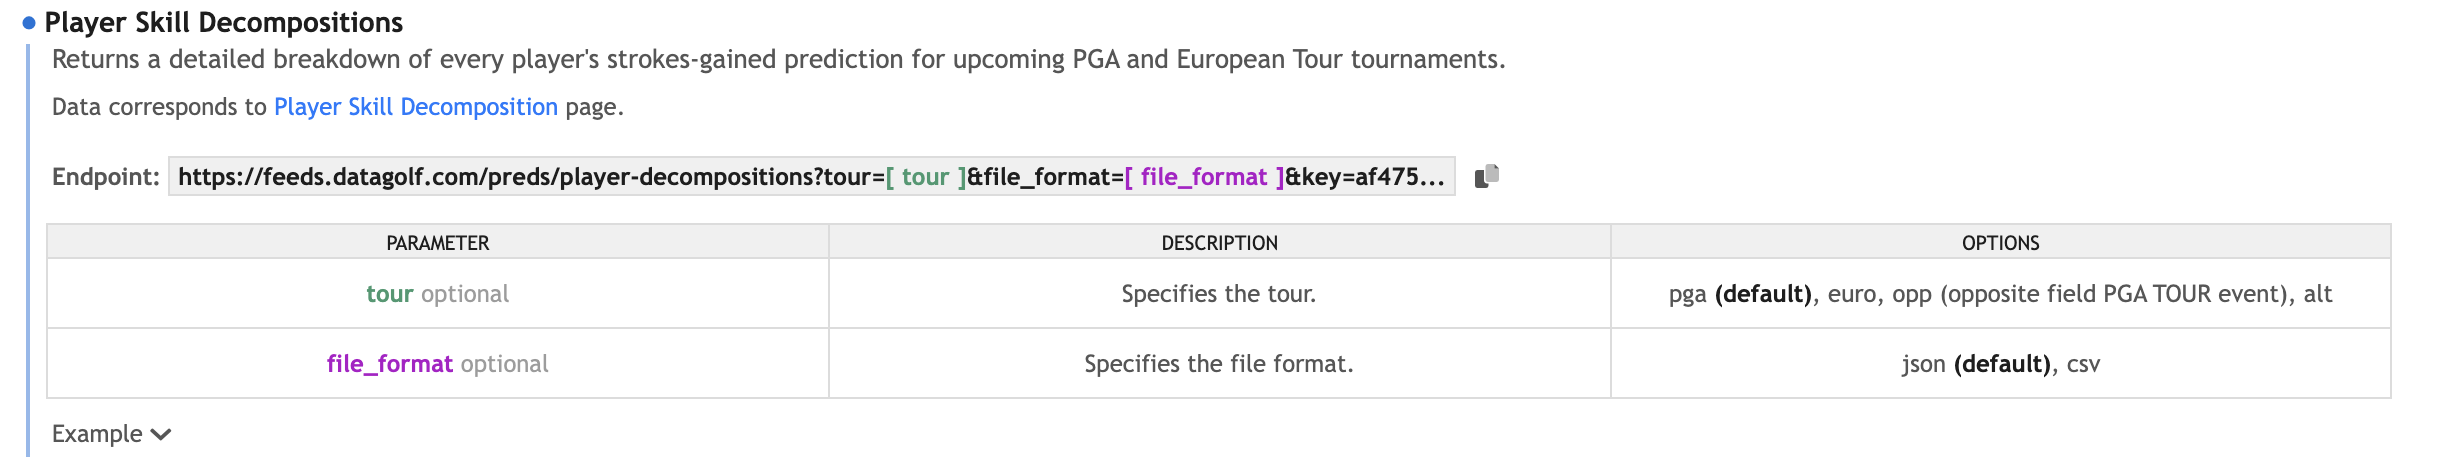

#### Player Skill Decomposition

In [8]:
tour = "pga"
url = f"https://feeds.datagolf.com/preds/player-decompositions?tour={tour}&file_format={file_format}&{api_key}"
r = requests.get(url)
players_skilld_json = r.json()
players_skilld_name = players_skilld_json["event_name"]
players_skilld = pd.DataFrame(players_skilld_json["players"])

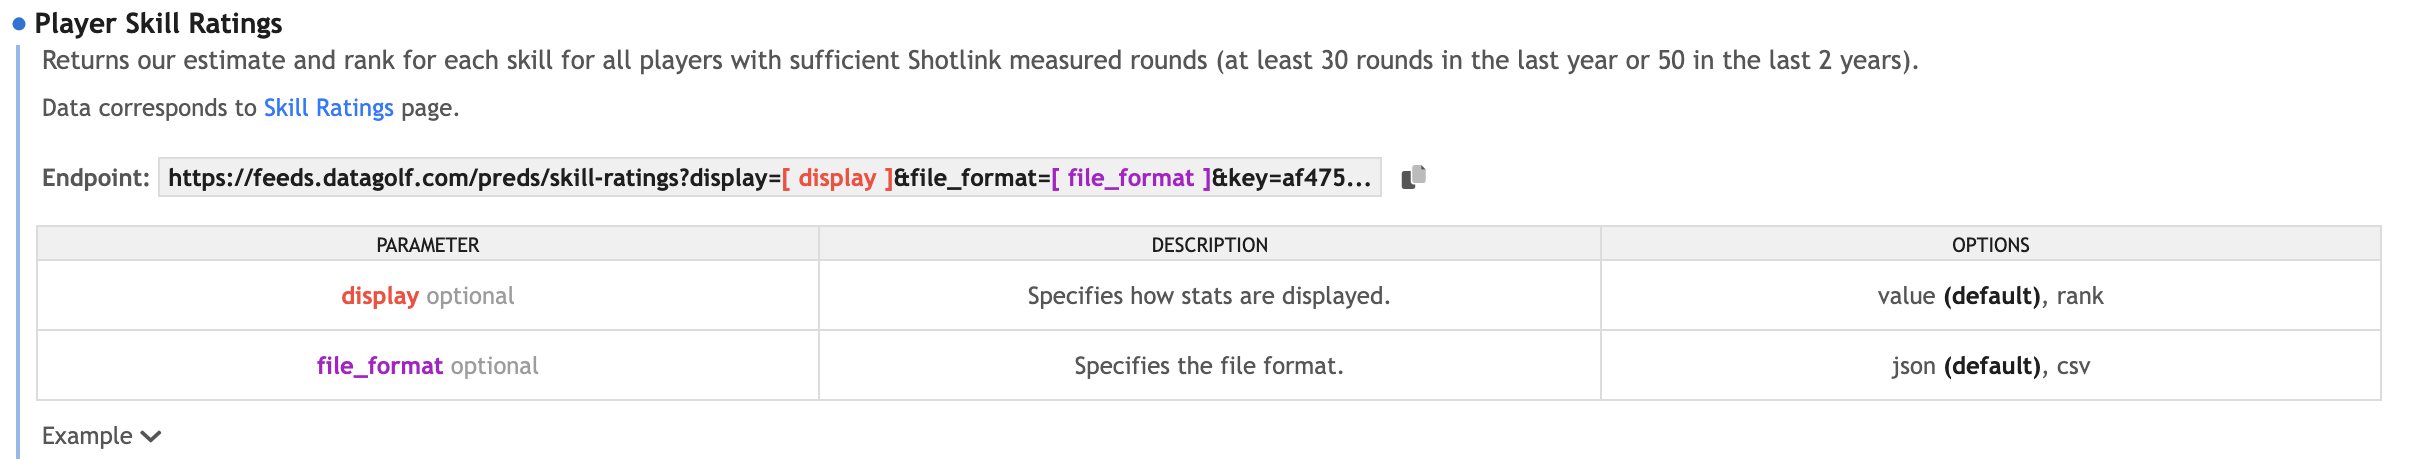

#### Player Skill Ratings

In [9]:
url = f"https://feeds.datagolf.com/preds/skill-ratings?display={display}&file_format={file_format}&{api_key}"
r = requests.get(url)
players_skillr_json = r.json()
players_skillr = pd.DataFrame(players_skillr_json["players"])

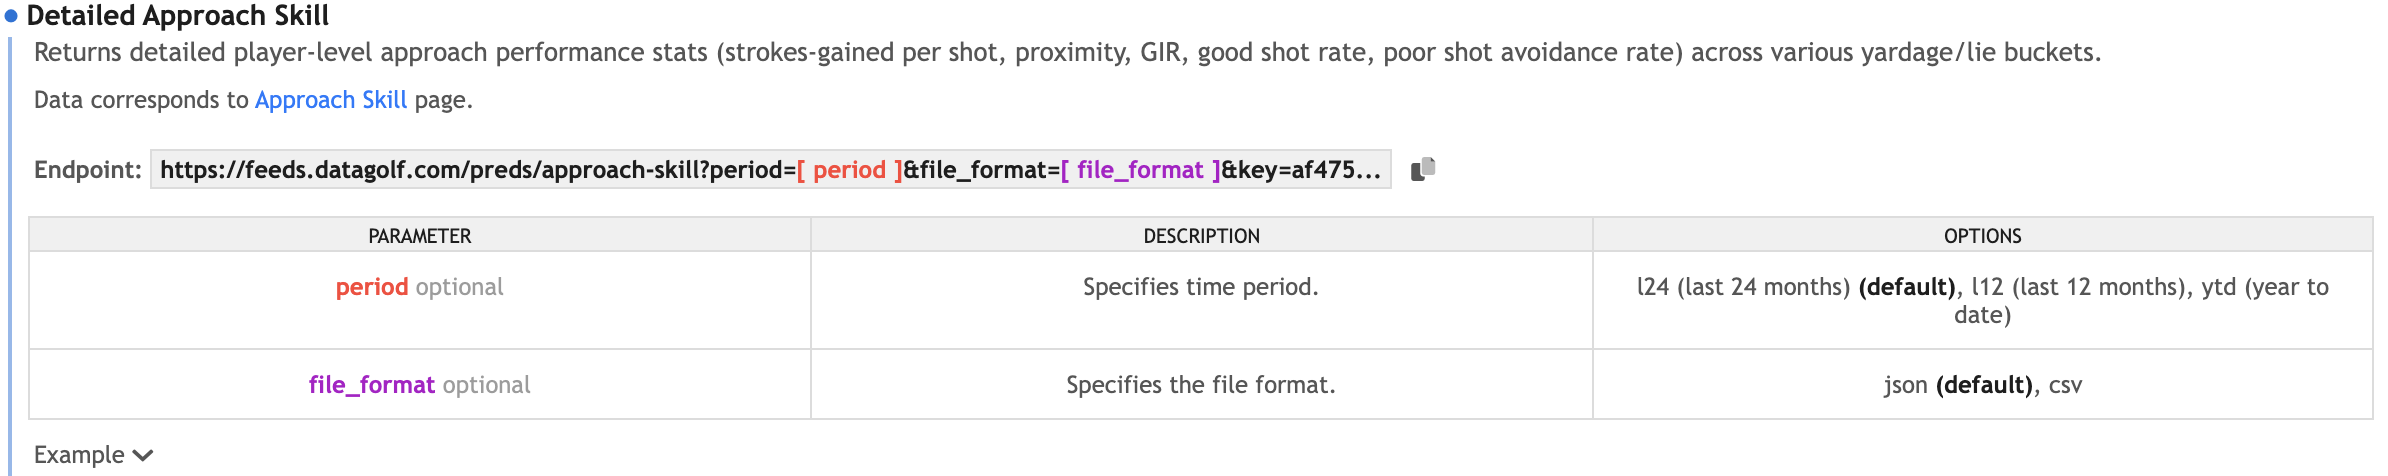

#### Detailed Approach Skill

In [10]:
period = "l24"
url = f"https://feeds.datagolf.com/preds/approach-skill?period={period}&file_format={file_format}&{api_key}"
r = requests.get(url)
app_skill_json = r.json()
app_skill = pd.DataFrame(app_skill_json["data"])

period = "l12"
url = f"https://feeds.datagolf.com/preds/approach-skill?period={period}&file_format={file_format}&{api_key}"
r = requests.get(url)
app_skill_json = r.json()
app_skill_12 = pd.DataFrame(app_skill_json["data"])

period = "ytd"
url = f"https://feeds.datagolf.com/preds/approach-skill?period={period}&file_format={file_format}&{api_key}"
r = requests.get(url)
app_skill_json = r.json()
app_skill_ytd = pd.DataFrame(app_skill_json["data"])


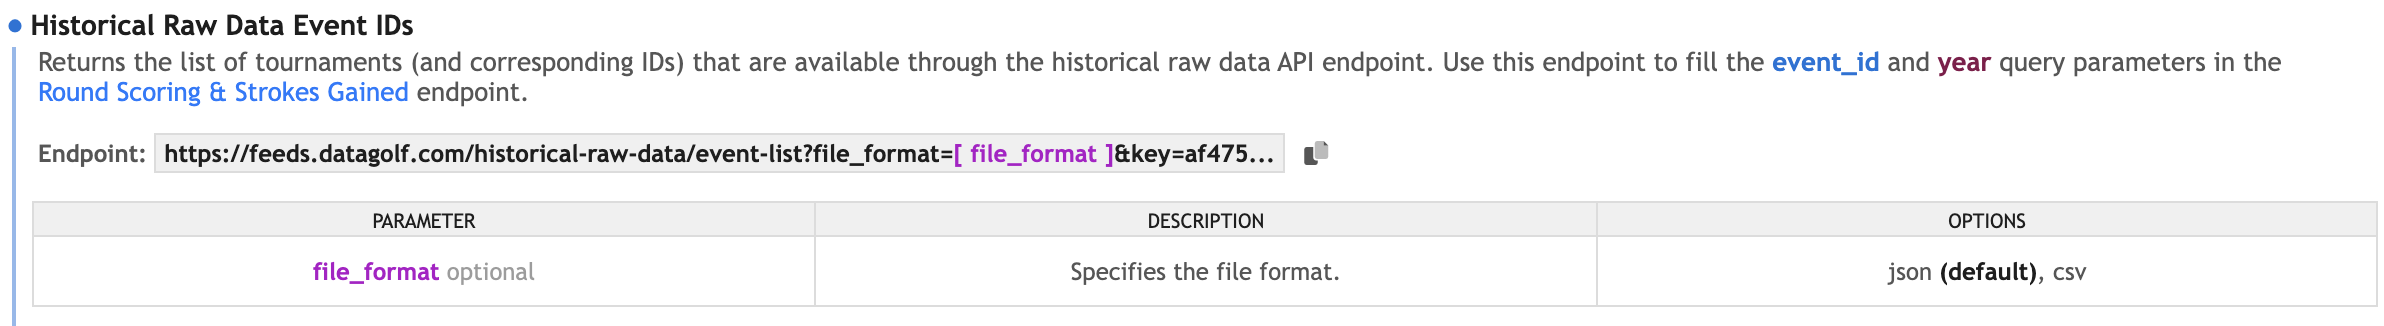

#### Historical Raw Data Event IDs

In [11]:
url = f"https://feeds.datagolf.com/historical-raw-data/event-list?file_format={file_format}&{api_key}"
r = requests.get(url)
event_id = r.json()
event_id = pd.DataFrame(event_id)

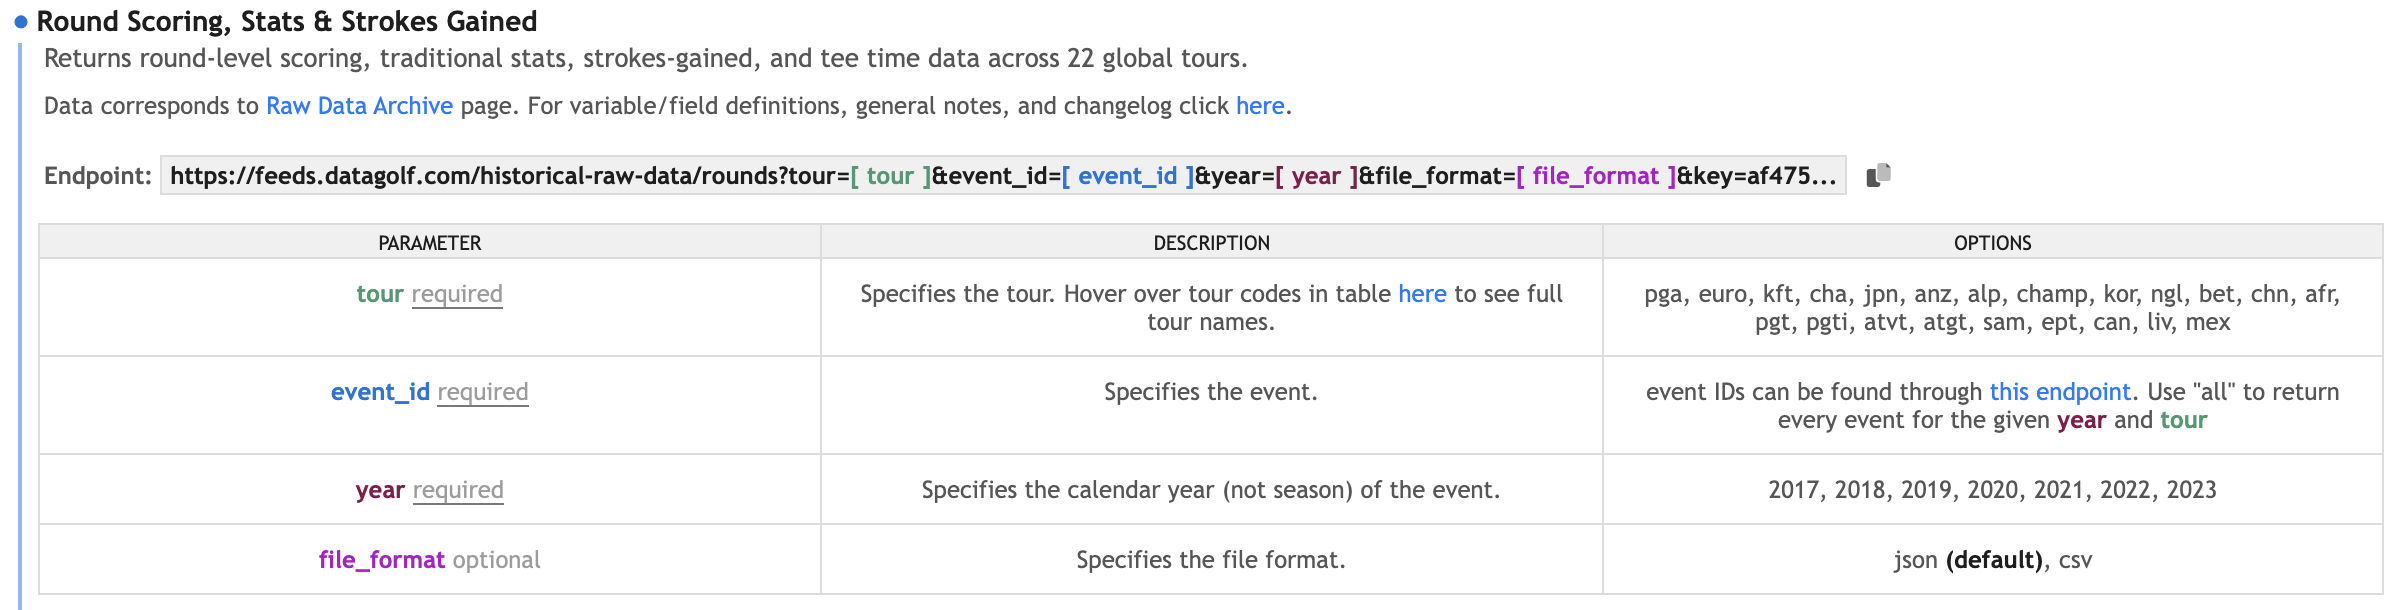

#### Round Scoring, Stats & Strokes Gained

In [12]:
event_id_num = "all"
tour = "pga"
year = 2023
#https://feeds.datagolf.com/historical-raw-data/rounds?tour=[ tour ]&event_id=[ event_id ]&year=[ year ]&file_format=[ file_format ]&key=af47518fe220516e4339fc678956
#url = f"https://feeds.datagolf.com/historical-raw-data/rounds?tour=pga&event_id=535&year=2021&file_format=json&{api_key}"
url = f"https://feeds.datagolf.com/historical-raw-data/rounds?tour={tour}&event_id={event_id_num}&year={year}&file_format={file_format}&{api_key}"
r = requests.get(url)

# 4) Filtering, Cleaning and Merging

Available DF: players, dg_rank, tour_predict_euro, tour_predict_pga, players_skilld, players_skillr, app_skill, event_id

### Merging

In [13]:
# Renaming player_name in each DF to not get merging problems (duplicate columns)
dg_rank.rename(columns={'player_name': "player_name_dg_rank"}, inplace=True)
players_skilld.rename(columns={'player_name': "player_name_sd_rank"}, inplace=True)
app_skill.rename(columns={'player_name': "player_name_apps_rank"}, inplace=True)
app_skill_12.rename(columns={'player_name': "player_name_apps_rank"}, inplace=True)
app_skill_ytd.rename(columns={'player_name': "player_name_apps_rank"}, inplace=True)
players_skillr.rename(columns={'player_name': "player_name_sr_rank"}, inplace=True)

In [14]:
# Merge relevant DataFrames on dg_id with full outer merge

# 1) with last 24 months app data
df1 = players.merge(dg_rank, on="dg_id", how="outer")
df2 = df1.merge(players_skillr, on="dg_id", how="outer")
df3 = df2.merge(players_skilld, on="dg_id", how="outer")
df4 = df3.merge(app_skill, on="dg_id", how="outer")

# 2) with last 12 months app data
df4_12 = df3.merge(app_skill_12, on="dg_id", how="outer")

# 3) with last YTD months app data
df4_ytd = df3.merge(app_skill_ytd, on="dg_id", how="outer")

In [15]:
# Create EU and USA Teams
rc_eu = df4["player_name"].isin(["McIlroy, Rory","Hovland, Viktor", "Rahm, Jon", "Fleetwood, Tommy", "Hatton, Tyrrell", "Fitzpatrick, Matthew", "Rose, Justin", "Aberg, Ludvig", "Hojgaard, Nicolai", "Lowry, Shane", "Macintyre, Robert", "Straka, Sepp"])
rc_usa = df4["player_name"].isin(["Scheffler, Scottie", "Schauffele, Xander", "Cantlay, Patrick", "Morikawa, Collin", "Homa, Max", "Clark, Wyndham", "Fowler, Rickie", "Harman, Brian", "Burns, Sam", "Bradley, Keegan", "Spieth, Jordan", "Thomas, Justin"])

In [16]:
# Locate Team Players and Create combined DataFrame
df_eu = df4.loc[rc_eu]
df_usa = df4.loc[rc_usa]

df_comb = pd.concat([df_eu, df_usa])

df_eu_12 = df4_12.loc[rc_eu]
df_usa_12 = df4_12.loc[rc_usa]

df_comb_12 = pd.concat([df_eu_12, df_usa_12])

df_eu_ytd = df4_ytd.loc[rc_eu]
df_usa_ytd = df4_ytd.loc[rc_usa]

df_comb_ytd = pd.concat([df_eu_ytd, df_usa_ytd])

In [32]:
# Calculate Mean
df_eu_mean = df_eu.mean()
df_eu_mean = pd.DataFrame(df_eu_mean)
df_eu_mean.rename(columns={0:"EU"}, inplace=True)

df_usa_mean = df_usa.mean()
df_usa_mean = pd.DataFrame(df_usa_mean)
df_usa_mean.rename(columns={0:"USA"}, inplace=True)

df_mean = pd.concat([df_usa_mean, df_eu_mean], axis=1)

/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/4241542454.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eu_mean = df_eu.mean()
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/4241542454.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_usa_mean = df_usa.mean()


In [80]:
# Map each player by TEAM

def map_country(country):
    if country == 'United States':
        return 'USA'
    else:
        return 'EU'

# Create a new column based on the mapping function
df_comb['Team'] = df_comb['country_x'].apply(map_country)
df_comb_12['Team'] = df_comb_12['country_x'].apply(map_country)
df_comb_ytd['Team'] = df_comb_ytd['country_x'].apply(map_country)

In [34]:
df_comb.sort_values(["sg_total"], inplace=True)
df_comb_12.sort_values(["sg_total"], inplace=True)
df_comb_ytd.sort_values(["sg_total"], inplace=True)

#df_comb.sort_values(["Team", "sg_total"], inplace=True)

In [35]:
# Strokes Gaines stats by Team (Mean+STD)

df_comb_mean = df_comb.groupby("Team").mean(numeric_only=True)
sg_mean = df_comb_mean[["sg_total","sg_putt", "sg_ott", "sg_arg", "sg_app"]]
df_comb_std = df_comb.groupby("Team").std(numeric_only=True)
sg_std = df_comb_std[["sg_total","sg_putt", "sg_ott", "sg_arg", "sg_app"]]

In [36]:
# Strokes Gianed Detailed Approach Stats in 24m, 12m or YTD
app_24 = df_comb[["player_name","100_150_fw_sg_per_shot", "150_200_fw_sg_per_shot", "50_100_fw_sg_per_shot", "over_150_rgh_sg_per_shot", "over_200_fw_sg_per_shot", "under_150_rgh_sg_per_shot", "sg_app", "Team"]]
app_12 = df_comb_12[["player_name","100_150_fw_sg_per_shot", "150_200_fw_sg_per_shot", "50_100_fw_sg_per_shot", "over_150_rgh_sg_per_shot", "over_200_fw_sg_per_shot", "under_150_rgh_sg_per_shot", "sg_app", "Team"]]
app_ytd = df_comb_ytd[["player_name","50_100_fw_sg_per_shot","100_150_fw_sg_per_shot", "150_200_fw_sg_per_shot", "over_200_fw_sg_per_shot", "under_150_rgh_sg_per_shot", "over_150_rgh_sg_per_shot", "sg_app", "Team"]]

In [37]:
# Good Shot Approach Stats in 24m, 12m or YTD
good_24 = df_comb[["player_name","50_100_fw_good_shot_rate", "100_150_fw_good_shot_rate", "150_200_fw_good_shot_rate", "over_200_fw_good_shot_rate", "under_150_rgh_good_shot_rate", "over_150_rgh_good_shot_rate", "Team"]]
good_12 = df_comb_12[["player_name","50_100_fw_good_shot_rate", "100_150_fw_good_shot_rate", "150_200_fw_good_shot_rate", "over_200_fw_good_shot_rate", "under_150_rgh_good_shot_rate", "over_150_rgh_good_shot_rate", "Team"]]
good_ytd = df_comb_ytd[["player_name","50_100_fw_good_shot_rate", "100_150_fw_good_shot_rate", "150_200_fw_good_shot_rate", "over_200_fw_good_shot_rate", "under_150_rgh_good_shot_rate", "over_150_rgh_good_shot_rate", "Team"]]

In [38]:
# Bad Approach Stats in 24m, 12m or YTD
bad_24 = df_comb[["player_name","50_100_fw_poor_shot_avoid_rate", "100_150_fw_poor_shot_avoid_rate", "150_200_fw_poor_shot_avoid_rate", "over_200_fw_good_shot_rate", "under_150_rgh_poor_shot_avoid_rate", "over_150_rgh_poor_shot_avoid_rate", "Team"]]
bad_12 = df_comb_12[["player_name","50_100_fw_poor_shot_avoid_rate", "100_150_fw_poor_shot_avoid_rate", "150_200_fw_poor_shot_avoid_rate", "over_200_fw_good_shot_rate", "under_150_rgh_poor_shot_avoid_rate", "over_150_rgh_poor_shot_avoid_rate", "Team"]]
bad_ytd = df_comb_ytd[["player_name","50_100_fw_poor_shot_avoid_rate", "100_150_fw_poor_shot_avoid_rate", "150_200_fw_poor_shot_avoid_rate", "over_200_fw_good_shot_rate", "under_150_rgh_poor_shot_avoid_rate", "over_150_rgh_poor_shot_avoid_rate", "Team"]]

In [39]:
# Driving Distance in 24m, 12m or YTD
driv_24 = df_comb[["player_name","driving_dist", "driving_acc", "Team"]]
driv_12 = df_comb_12[["player_name","driving_dist", "driving_acc", "Team"]]
driv_ytd = df_comb_ytd[["player_name","driving_dist", "driving_acc", "Team"]]

In [ ]:
# Take Strokes gained 
sg_12 = df_comb[["player_name","sg_total", "sg_arg", "sg_app", "sg_ott", "sg_putt","Team"]]
sg_12.sort_values(by="sg_total", ascending=False, inplace=True)

# 5) Visualizing

In [71]:
hex_colors = [
    '#FF0000',  # Red
    '#0000FF'   # Blue
]

In [72]:
sns.set_theme(style="whitegrid")

/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/2379501185.py:19: UserWarning: 
The markers list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_comb, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/2379501185.py:19: UserWarning: 
The markers list has fewer values (1) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_comb, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/2379501185.py:19: UserWarning: 
The markers list has fewer values (1) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_comb, x="player_name", y=col, hue="Team", palette=hex_colors,

[<matplotlib.lines.Line2D object at 0x16913e010>, <matplotlib.lines.Line2D object at 0x16a64b3d0>, <matplotlib.lines.Line2D object at 0x16a0bd510>, <matplotlib.lines.Line2D object at 0x1652cba90>, <matplotlib.lines.Line2D object at 0x16a526dd0>]
dict_keys(['sg_total', 'sg_arg', 'sg_app', 'sg_ott', 'sg_putt'])


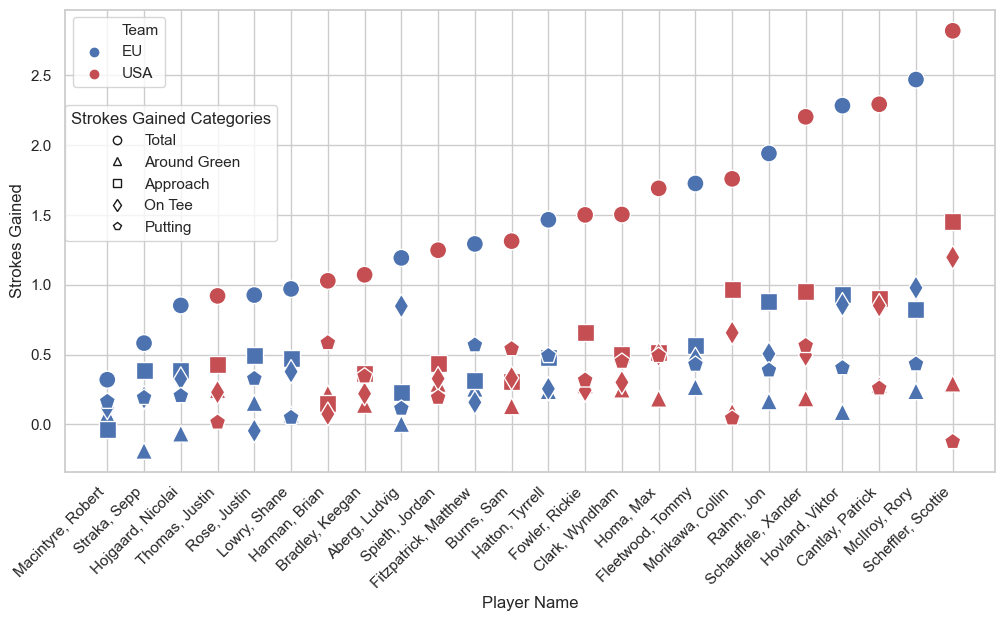

In [82]:


# Create a single figure and axis to hold all scatterplots
fig, ax = plt.subplots(figsize=(12, 6))

style_dict = {
    "sg_total": "o",
    "sg_arg": "^",
    "sg_app": "s",
    "sg_ott": "d",
    "sg_putt": "p",
}

hex_colors = ["b", "r"]  # Define custom colors

# Loop through each scatterplot and plot the data
columns = ["sg_total", "sg_arg", "sg_app", "sg_ott", "sg_putt"]
legend_handles = []

for col in columns:
    sns.scatterplot(data=df_comb, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
    legend_handles.append(mlines.Line2D([], [], marker=style_dict[col], mec='k', mfc='w', ls=''))

ax.set_ylabel("Strokes Gained")
ax.set_xlabel("Player Name")
# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove the repeated legend
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[:3], labels[:3])
team_l = plt.legend(handles[:3], labels[:3])
ax.add_artist(team_l)

# Add the additional legends for markers
ax.legend(legend_handles, ["Total", "Around Green", "Approach", "On Tee", "Putting"], loc=(0, 0.5), title="Strokes Gained Categories")
print(legend_handles)
print(style_dict.keys())

plt.savefig("sg_category_comb.png") #transparent=True)
plt.show()

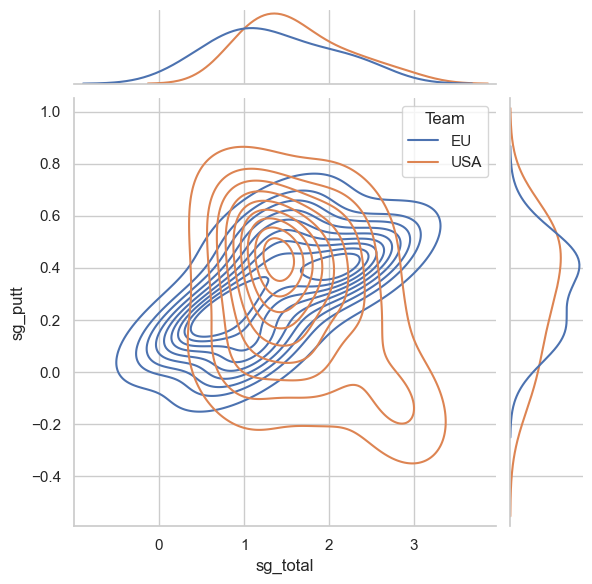

In [164]:
g = sns.jointplot(
    data=df_comb,
    x="sg_total", y="sg_putt", hue="Team",
    kind="kde",
)

[0.31383333333333335, 0.41975, 0.10766666666666667, 0.49324999999999997]
[0.31383333333333335, 0.41975, 0.10766666666666667, 0.49324999999999997, 0.31383333333333335]
[0.3065833333333334, 0.4524166666666667, 0.216, 0.637]
[0.3065833333333334, 0.4524166666666667, 0.216, 0.637, 0.3065833333333334]


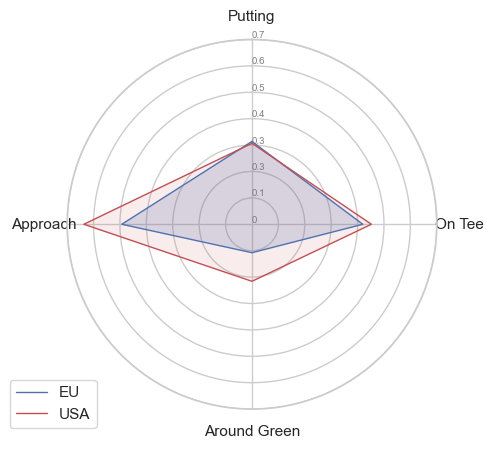

In [115]:
# ------- PART 1: Create background
 
# number of variable
categories=list(sg_mean)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], ["Putting", "On Tee", "Around Green", "Approach"])
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7], ["0","0.1","0.3","0.3","0.4","0.5","0.6","0.7"], color="grey", size=7)
plt.ylim(0,0.7)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=sg_mean.iloc[0][1:].values.flatten().tolist()
print(values)
values += values[:1]
print(values)
ax.plot(angles, values, linewidth=1, linestyle='solid', label=sg_mean.index[0], color="b")
ax.fill(angles, values, 'b', alpha=0.2)
 
# Ind2
values=sg_mean.iloc[1][1:].values.flatten().tolist()
print(values)
values += values[:1]
print(values)
ax.plot(angles, values, linewidth=1, linestyle='solid', label=sg_mean.index[1], color="r")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig("sg_mean_radar.png", transparent=True)
# Show the graph
plt.show()

[0.16425912640112456, 0.32480571115668516, 0.1410224568405094, 0.27945437910328047]
[0.16425912640112456, 0.32480571115668516, 0.1410224568405094, 0.27945437910328047, 0.16425912640112456]
[0.23538612700811148, 0.31622818525791646, 0.06924528208411812, 0.36738436647096556]
[0.23538612700811148, 0.31622818525791646, 0.06924528208411812, 0.36738436647096556, 0.23538612700811148]


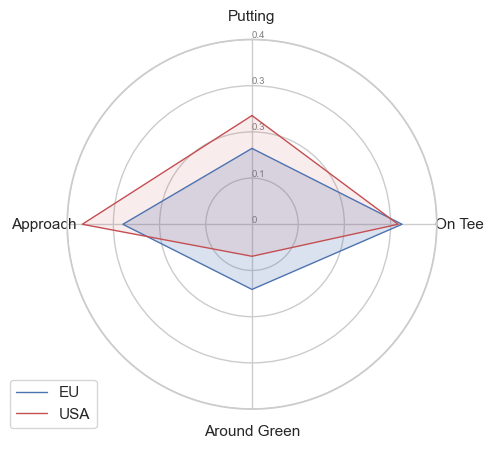

In [116]:
# ------- PART 1: Create background
 
# number of variable
categories=list(sg_std)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], ["Putting", "On Tee", "Around Green", "Approach"])
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7], ["0","0.1","0.3","0.3","0.4","0.5","0.6","0.7"], color="grey", size=7)
plt.ylim(0,0.4)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=sg_std.iloc[0][1:].values.flatten().tolist()
print(values)
values += values[:1]
print(values)
ax.plot(angles, values, linewidth=1, linestyle='solid', label=sg_std.index[0], color="b")
ax.fill(angles, values, 'b', alpha=0.2)
 
# Ind2
values=sg_std.iloc[1][1:].values.flatten().tolist()
print(values)
values += values[:1]
print(values)
ax.plot(angles, values, linewidth=1, linestyle='solid', label=sg_std.index[1], color="r")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("sg_std_radar.png", transparent=True)
# Show the graph
plt.show()

/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/1740232570.py:29: UserWarning: 
The markers list has fewer values (1) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_24, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/1740232570.py:29: UserWarning: 
The markers list has fewer values (1) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_24, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/1740232570.py:29: UserWarning: 
The markers list has fewer values (1) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_24, x="player_name", y=col, hue="Team", palette=hex_colors, ax

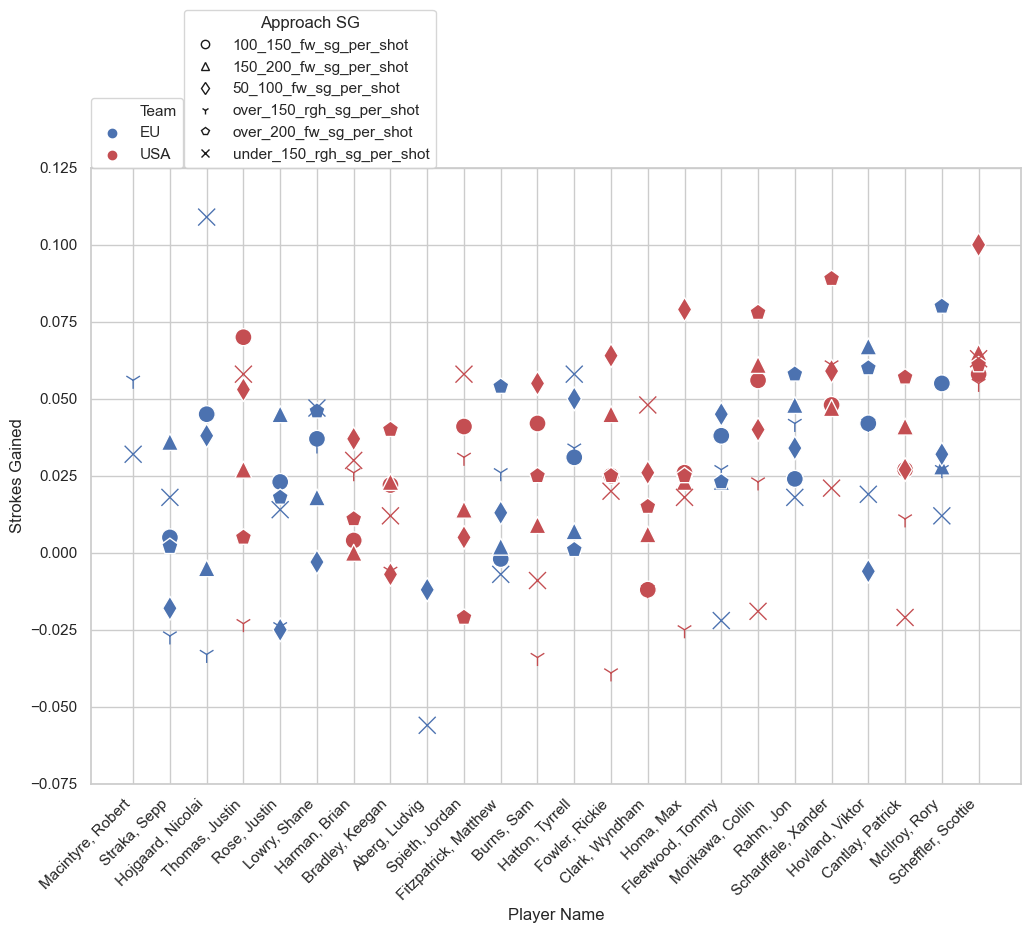

In [97]:
# Create a scatterplot

# Optional: Set the plot style
sns.set(style="whitegrid") 

sns.set_style("whitegrid")

hex_colors = ["b", "r"]  # Define custom colors

legend_handles = []

# Create a single figure and axis to hold all scatterplots
fig, ax = plt.subplots(figsize=(12, 8))

style_dict = {
    "100_150_fw_sg_per_shot": "o",
    "150_200_fw_sg_per_shot": "^",
    "50_100_fw_sg_per_shot": "d",
    "over_150_rgh_sg_per_shot": "1",
    "over_200_fw_sg_per_shot": "p",
    "under_150_rgh_sg_per_shot": "x",
}

# Loop through each scatterplot and plot the data
columns = ['100_150_fw_sg_per_shot', '150_200_fw_sg_per_shot',
       '50_100_fw_sg_per_shot', 'over_150_rgh_sg_per_shot',
       'over_200_fw_sg_per_shot', 'under_150_rgh_sg_per_shot']
for col in columns:
    sns.scatterplot(data=app_24, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
    legend_handles.append(mlines.Line2D([], [], marker=style_dict[col], mec='k', mfc='w', ls=''))

ax.set_ylabel("Strokes Gained")
ax.set_xlabel("Player Name")
# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove the repeated legend
handles, labels = ax.get_legend_handles_labels()

team_l = plt.legend(handles[:3], labels[:3], loc=(0, 1))
ax.add_artist(team_l)

# Add the additional legends for markers
ax.legend(legend_handles, style_dict.keys(), loc=(0.1, 1), title="Approach SG")

y_min = -0.075  # Minimum y-value
y_max = 0.125   # Maximum y-value
ax.set_ylim(y_min, y_max)

#plt.tight_layout()
plt.show()

/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/1377041104.py:30: UserWarning: 
The markers list has fewer values (1) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_12, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/1377041104.py:30: UserWarning: 
The markers list has fewer values (1) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_12, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/1377041104.py:30: UserWarning: 
The markers list has fewer values (1) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_12, x="player_name", y=col, hue="Team", palette=hex_colors, ax

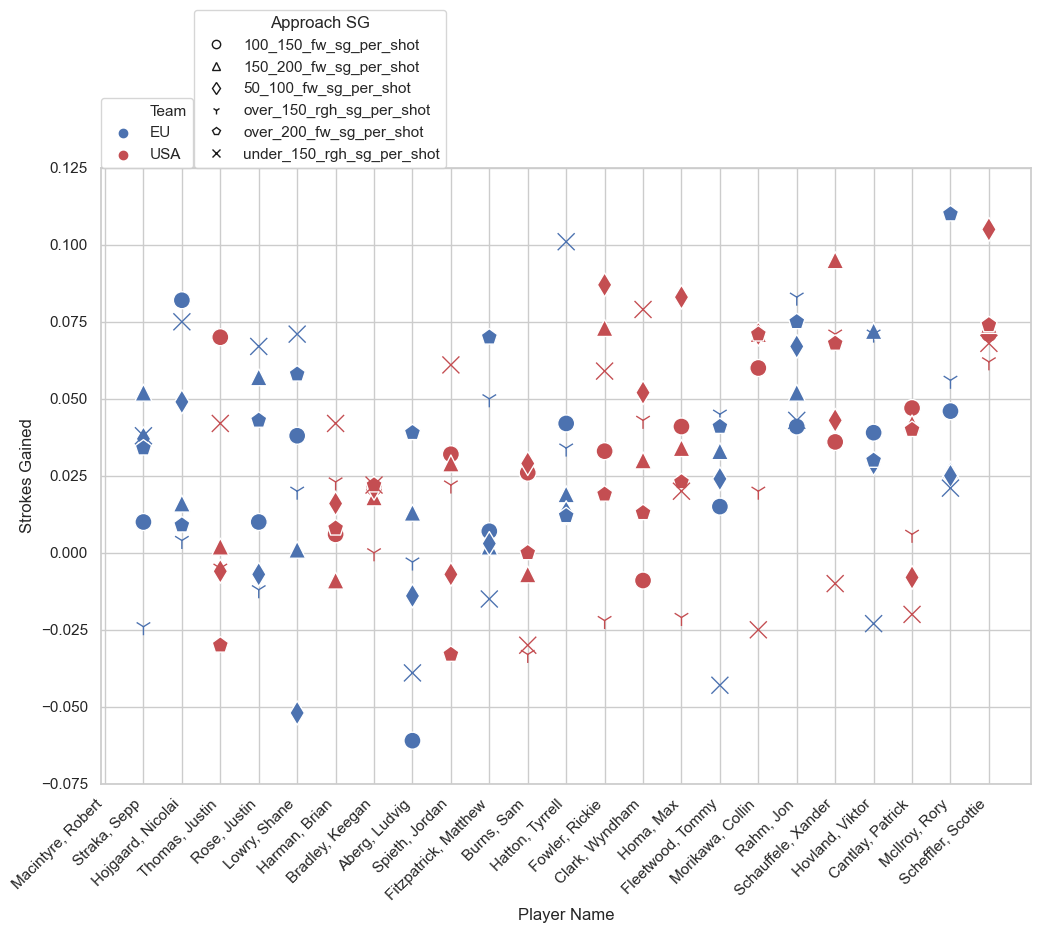

In [56]:
# Create a scatterplot

# Optional: Set the plot style
sns.set(style="whitegrid") 

sns.set_style("whitegrid")

hex_colors = ["b", "r"]  # Define custom colors

legend_handles = []

# Create a single figure and axis to hold all scatterplots
fig, ax = plt.subplots(figsize=(12, 8))

style_dict = {
    "100_150_fw_sg_per_shot": "o",
    "150_200_fw_sg_per_shot": "^",
    "50_100_fw_sg_per_shot": "d",
    "over_150_rgh_sg_per_shot": "1",
    "over_200_fw_sg_per_shot": "p",
    "under_150_rgh_sg_per_shot": "x",
}


# Loop through each scatterplot and plot the data
columns = ['100_150_fw_sg_per_shot', '150_200_fw_sg_per_shot',
       '50_100_fw_sg_per_shot', 'over_150_rgh_sg_per_shot',
       'over_200_fw_sg_per_shot', 'under_150_rgh_sg_per_shot']
for col in columns:
    sns.scatterplot(data=app_12, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
    legend_handles.append(mlines.Line2D([], [], marker=style_dict[col], mec='k', mfc='w', ls=''))

ax.set_ylabel("Strokes Gained")
ax.set_xlabel("Player Name")
# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove the repeated legend
handles, labels = ax.get_legend_handles_labels()

team_l = plt.legend(handles[:3], labels[:3], loc=(0, 1))
ax.add_artist(team_l)

# Add the additional legends for markers
ax.legend(legend_handles, style_dict.keys(), loc=(0.1, 1), title="Approach SG")

y_min = -0.075  # Minimum y-value
y_max = 0.125   # Maximum y-value
ax.set_ylim(y_min, y_max)

#plt.tight_layout()
plt.show()

In [57]:
app_ytd.columns

Index(['player_name', '50_100_fw_sg_per_shot', '100_150_fw_sg_per_shot',
       '150_200_fw_sg_per_shot', 'over_200_fw_sg_per_shot',
       'under_150_rgh_sg_per_shot', 'over_150_rgh_sg_per_shot', 'sg_app',
       'Team'],
      dtype='object')

/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/2756138884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_ytd.sort_values(by="sg_app", ascending=True, inplace=True)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/2756138884.py:31: UserWarning: 
The markers list has fewer values (1) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_ytd, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/2756138884.py:31: UserWarning: 
The markers list has fewer values (1) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=app_ytd, x="player_name", y=col, hue=

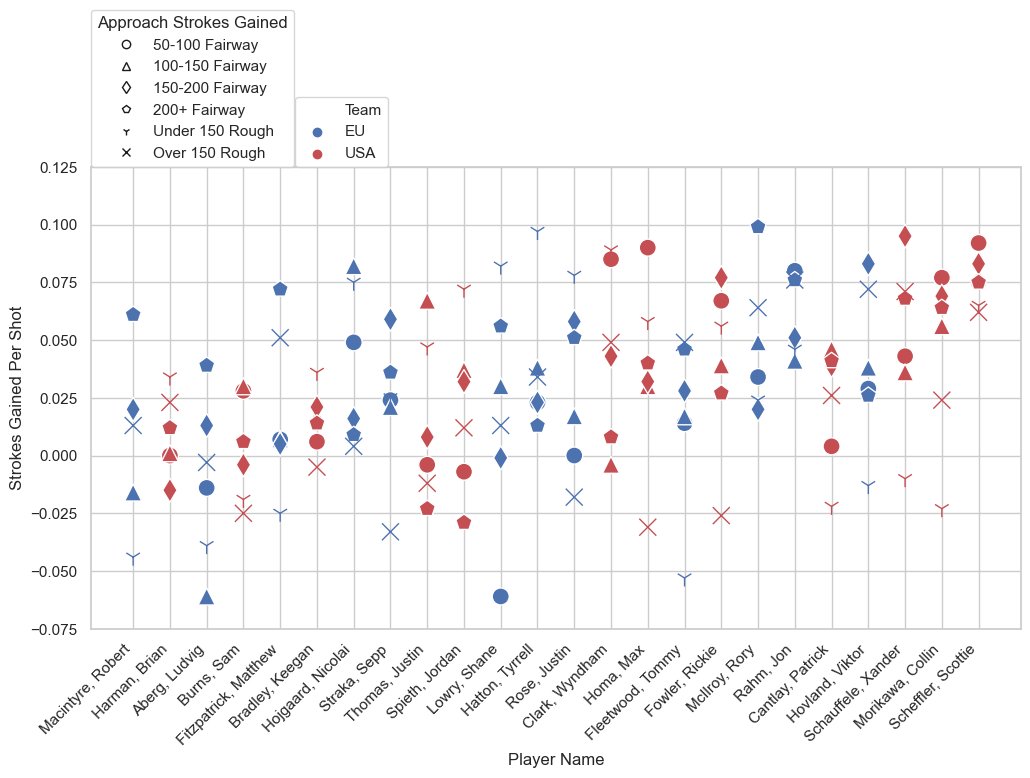

In [141]:
app_ytd.sort_values(by="sg_app", ascending=True, inplace=True)

# Create a scatterplot

# Optional: Set the plot style
sns.set(style="whitegrid") 

sns.set_style("whitegrid")

hex_colors = ["b", "r"]  # Define custom colors

legend_handles = []

# Create a single figure and axis to hold all scatterplots
fig, ax = plt.subplots(figsize=(12, 6))

style_dict = {
    "50_100_fw_sg_per_shot": "o",
    "100_150_fw_sg_per_shot": "^",
    "150_200_fw_sg_per_shot": "d",
    "over_200_fw_sg_per_shot": "p",
    "under_150_rgh_sg_per_shot": "1",
    "over_150_rgh_sg_per_shot": "x",
}


# Loop through each scatterplot and plot the data
columns = ['50_100_fw_sg_per_shot', '100_150_fw_sg_per_shot', '150_200_fw_sg_per_shot',
       'over_200_fw_sg_per_shot', 'under_150_rgh_sg_per_shot', 'over_150_rgh_sg_per_shot']
for col in columns:
    sns.scatterplot(data=app_ytd, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
    legend_handles.append(mlines.Line2D([], [], marker=style_dict[col], mec='k', mfc='w', ls=''))

ax.set_ylabel("Strokes Gained Per Shot")
ax.set_xlabel("Player Name")
# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove the repeated legend
handles, labels = ax.get_legend_handles_labels()

team_l = plt.legend(handles[:3], labels[:3], loc=(0.22, 1))
ax.add_artist(team_l)

# Add the additional legends for markers
ax.legend(legend_handles, ["50-100 Fairway", "100-150 Fairway", "150-200 Fairway", "200+ Fairway", "Under 150 Rough", "Over 150 Rough"], loc=(0, 1), title="Approach Strokes Gained")


y_min = -0.075  # Minimum y-value
y_max = 0.125   # Maximum y-value
ax.set_ylim(y_min, y_max)

#plt.tight_layout()
plt.show()


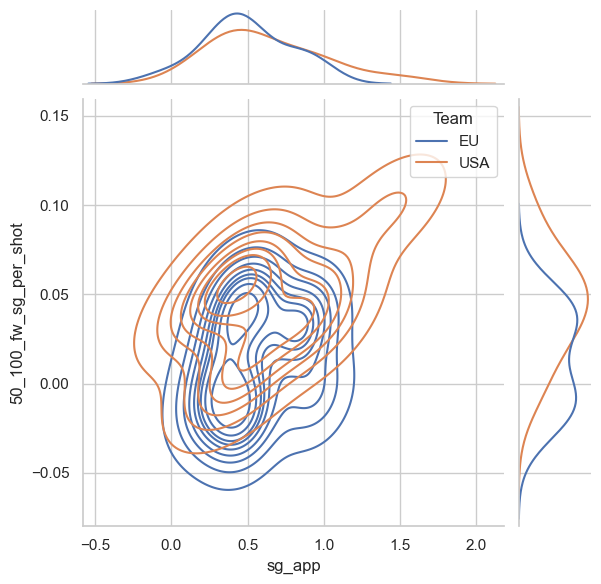

In [59]:
sns.jointplot(data=app_24, x="sg_app", y="50_100_fw_sg_per_shot", hue="Team", kind="kde")

/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/4231049491.py:30: UserWarning: 
The markers list has fewer values (1) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=good_ytd, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/4231049491.py:30: UserWarning: 
The markers list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=good_ytd, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
/var/folders/24/9rkfbb1x79984hp2hwwc0drm0000gn/T/ipykernel_38272/4231049491.py:30: UserWarning: 
The markers list has fewer values (1) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=good_ytd, x="player_name", y=col, hue="Team", palette=hex_colo

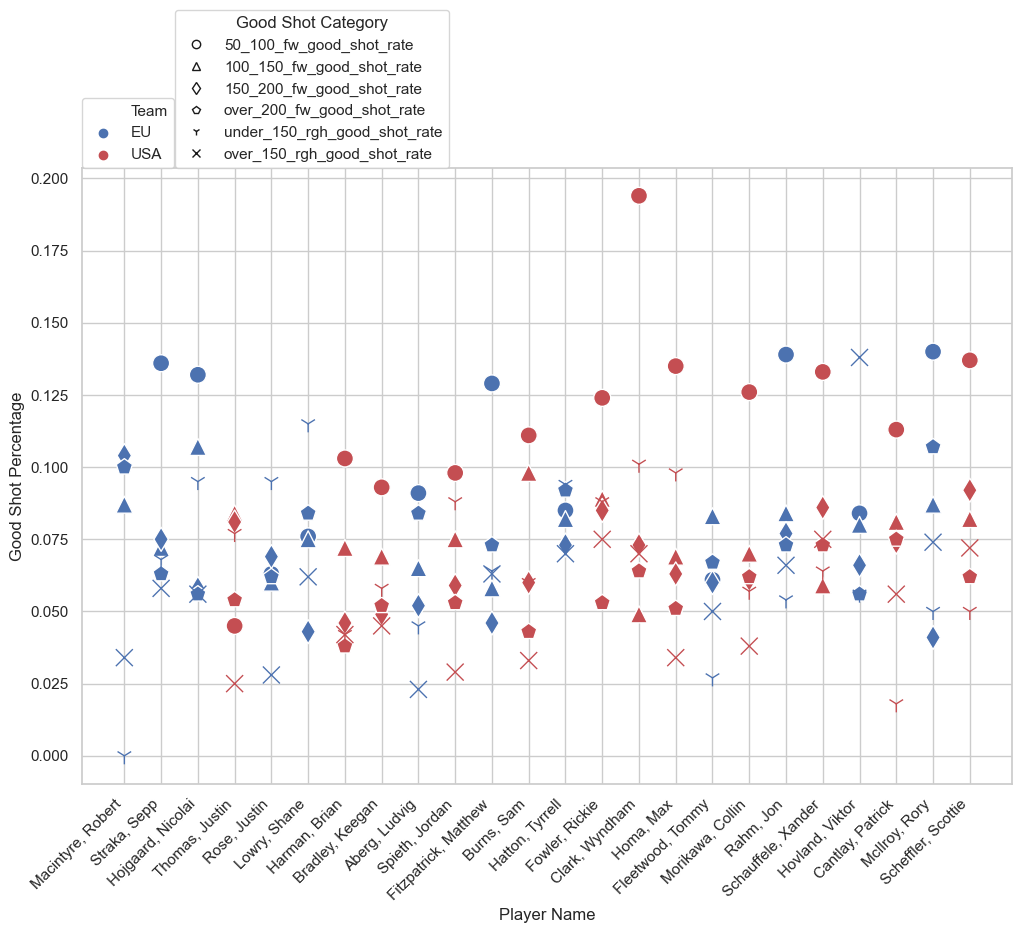

In [60]:
# Create a scatterplot

# Optional: Set the plot style
sns.set(style="whitegrid") 

sns.set_style("whitegrid")

hex_colors = ["b", "r"]  # Define custom colors

legend_handles = []

# Create a single figure and axis to hold all scatterplots
fig, ax = plt.subplots(figsize=(12, 8))

style_dict = {
    "50_100_fw_good_shot_rate": "o",
    "100_150_fw_good_shot_rate": "^",
    "150_200_fw_good_shot_rate": "d",
    "over_200_fw_good_shot_rate": "p",
    "under_150_rgh_good_shot_rate": "1",
    "over_150_rgh_good_shot_rate": "x",
}


# Loop through each scatterplot and plot the data
columns = ['50_100_fw_good_shot_rate', '100_150_fw_good_shot_rate',
       '150_200_fw_good_shot_rate', 'over_200_fw_good_shot_rate',
       'under_150_rgh_good_shot_rate', 'over_150_rgh_good_shot_rate']
for col in columns:
    sns.scatterplot(data=good_ytd, x="player_name", y=col, hue="Team", palette=hex_colors, ax=ax, style=col, markers=[style_dict[col]], s=150)
    legend_handles.append(mlines.Line2D([], [], marker=style_dict[col], mec='k', mfc='w', ls=''))

ax.set_ylabel("Good Shot Percentage")
ax.set_xlabel("Player Name")
# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove the repeated legend
handles, labels = ax.get_legend_handles_labels()

team_l = plt.legend(handles[:3], labels[:3], loc=(0, 1))
ax.add_artist(team_l)

# Add the additional legends for markers
ax.legend(legend_handles, style_dict.keys(), loc=(0.1, 1), title="Good Shot Category")


#y_min = -0.075  # Minimum y-value
#y_max = 0.125   # Maximum y-value
#ax.set_ylim(y_min, y_max)

#plt.tight_layout()
plt.show()


In [61]:
good_24.columns

Index(['player_name', '50_100_fw_good_shot_rate', '100_150_fw_good_shot_rate',
       '150_200_fw_good_shot_rate', 'over_200_fw_good_shot_rate',
       'under_150_rgh_good_shot_rate', 'over_150_rgh_good_shot_rate', 'Team'],
      dtype='object')

AttributeError: module 'seaborn' has no attribute 'set_xticklabels'

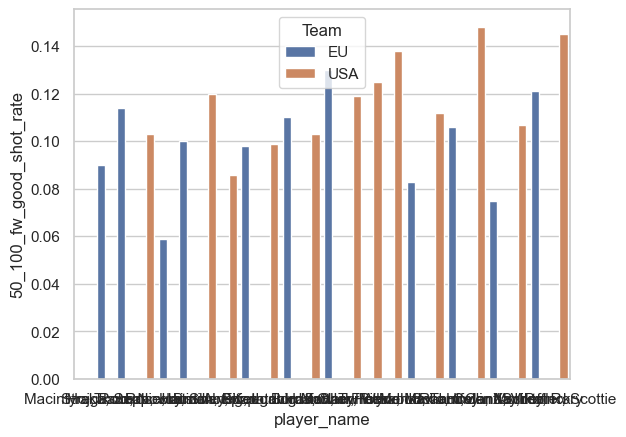

In [62]:
sns.barplot(data=good_24, x="player_name", y="50_100_fw_good_shot_rate",hue="Team")
sns.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

#[['50_100_fw_good_shot_rate', '100_150_fw_good_shot_rate','150_200_fw_good_shot_rate', 'over_200_fw_good_shot_rate', 'under_150_rgh_good_shot_rate','over_150_rgh_good_shot_rate']]

In [ ]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=driv_ytd, x="driving_dist", y="Team", hue="Team", palette=hex_colors)
ax.set(ylabel="Team")

In [63]:
driv_ytd

,player_name,driving_dist,driving_acc,Team
1847,"Macintyre, Robert",7.611,-0.048,EU
2850,"Straka, Sepp",2.882,0.052,EU
1236,"Hojgaard, Nicolai",15.589,-0.058,EU
2925,"Thomas, Justin",9.194,-0.024,USA
2545,"Rose, Justin",0.251,0.027,EU
1816,"Lowry, Shane",3.530,0.032,EU
1132,"Harman, Brian",-5.899,0.062,USA
266,"Bradley, Keegan",5.893,0.008,USA
1,"Aberg, Ludvig",15.292,0.011,EU
2803,"Spieth, Jordan",5.754,-0.001,USA


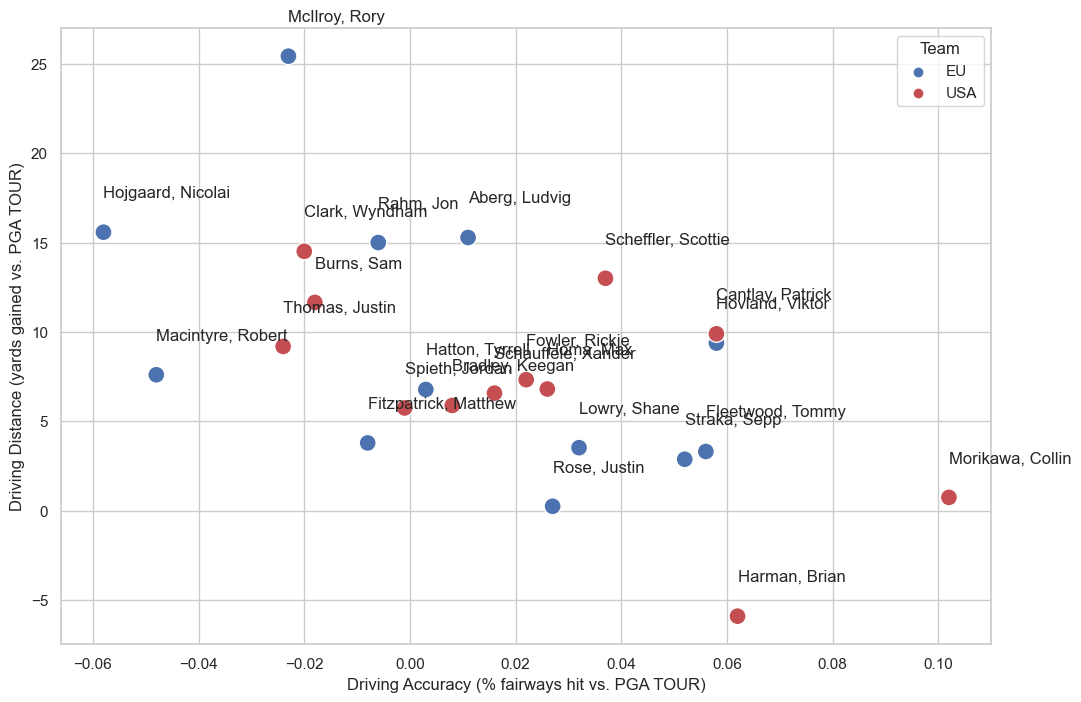

In [120]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=driv_ytd, x="driving_acc", y="driving_dist", hue="Team", palette=hex_colors, s=150)
ax.set(ylabel="Driving Distance (yards gained vs. PGA TOUR)")
ax.set(xlabel="Driving Accuracy (% fairways hit vs. PGA TOUR)")

for i, row in driv_ytd.iterrows():
    ax.annotate(row['player_name'], (row['driving_acc'], row['driving_dist']),
                textcoords="offset points", xytext=(0,25), ha='left')
plt.savefig("driving.png", transparent=True)
    
plt.show()

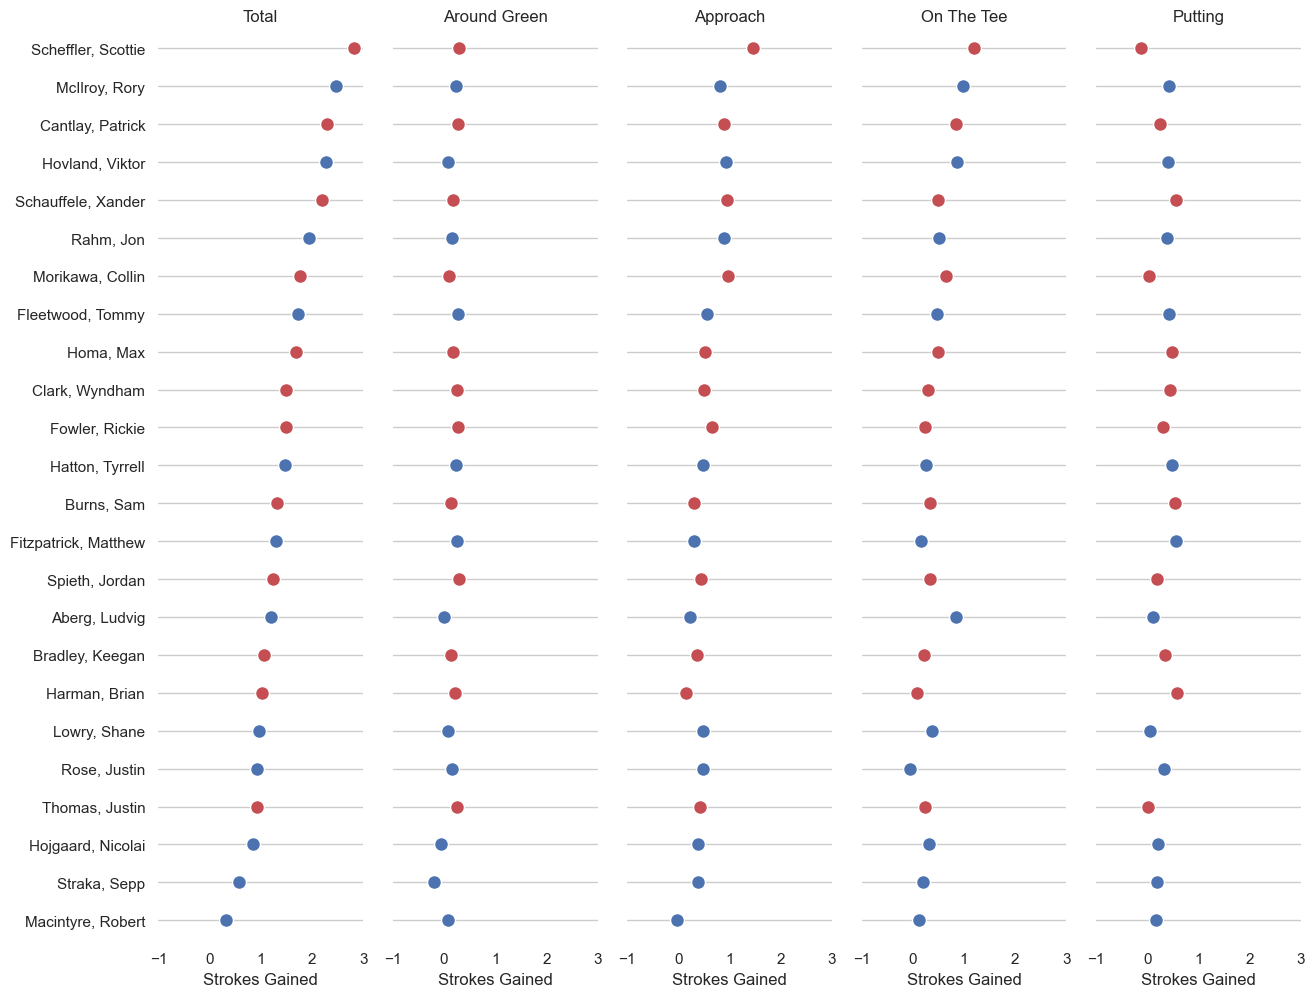

In [69]:
# Make the PairGrid
g = sns.PairGrid(sg_12,
                 x_vars=sg_12.columns[1:-1], y_vars=["player_name"],
                 height=10, aspect=.25, hue="Team", palette=["r", "b"])

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette=hex_colors, linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-1, 3), xlabel="Strokes Gained", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total", "Around Green", "Approach",
          "On The Tee", "Putting"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

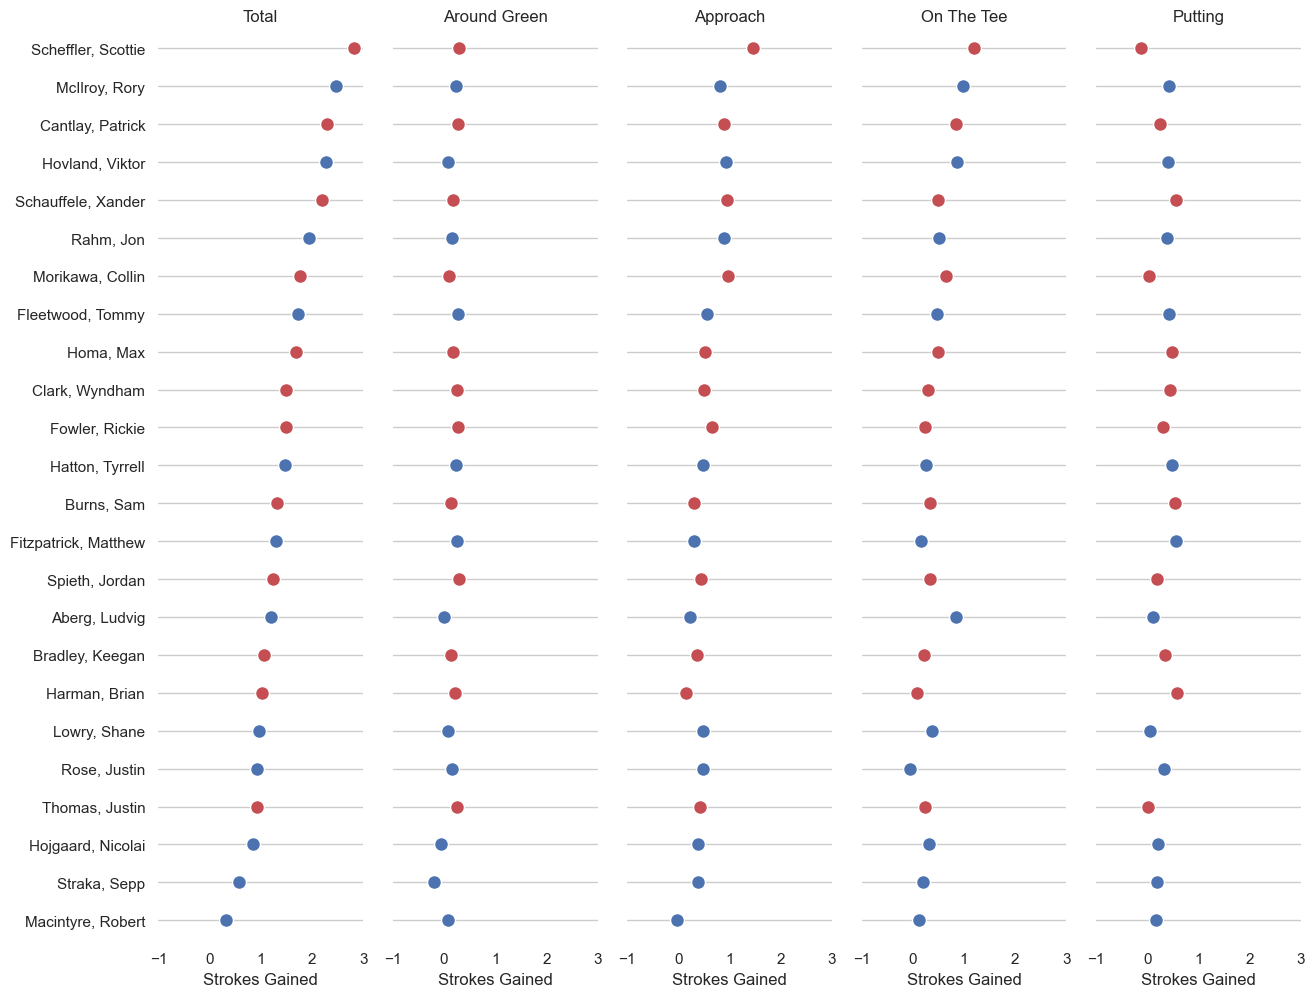

In [70]:
# Make the PairGrid
g = sns.PairGrid(sg_12,
                 x_vars=sg_12.columns[1:-1], y_vars=["player_name"],
                 height=10, aspect=.25, hue="Team", palette=["r", "b"])

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette=hex_colors, linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-1, 3), xlabel="Strokes Gained", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total", "Around Green", "Approach",
          "On The Tee", "Putting"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)